In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt  #画图用 
#%是jupyter notebook的魔法命令
%matplotlib inline
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [30]:
df=pd.read_excel('C:/Users/ganziqi/Desktop/论文资料/数据/ICFS.xlsx')
height,width = df.shape
print(height,width,type(df))

3898 2 <class 'pandas.core.frame.DataFrame'>


In [31]:
df.index=pd.to_datetime(df.date,errors='coerce')
df.head()

,date,ICFS
date,,
2006-10-08,2006-10-08,0.072207
2006-10-09,2006-10-09,0.108846
2006-10-10,2006-10-10,0.108262
2006-10-11,2006-10-11,0.075551
2006-10-12,2006-10-12,0.102232


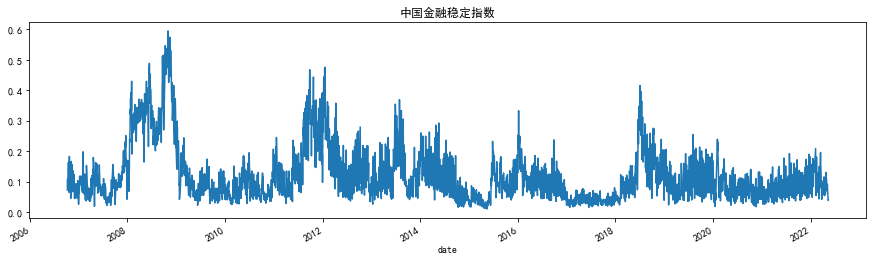

In [32]:
df.ICFS.plot(title='中国金融稳定指数',figsize=(15,4))
plt.show()

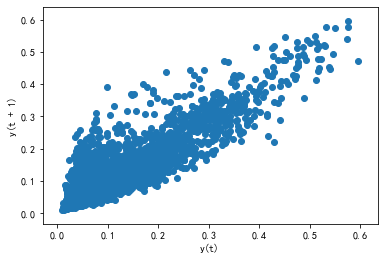

In [33]:
#判断是否存在自回归效应
# from pandas import Series
# from matplotlib import pyplot
# from pandas.plotting import lag_plot
# lag_plot(df.ICFS)
# pyplot.show()
#图像向右上方倾斜，则存在自回归

In [6]:
#平稳性检验
#使用arch包中的单位根检验unitroot导入ADF
# from arch.unitroot import ADF
# ADF(df.ICFS)

In [7]:
# import statsmodels.api as sm
# sm.tsa.arma_order_select_ic(df.ICFS,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC
#sm.tsa.arma_order_select_ic(ts,max_ar=6,max_ma=4,ic='bic')['bic_min_order']  # BIC
#sm.tsa.arma_order_select_ic(ts,max_ar=6,max_ma=4,ic='hqic')['hqic_min_order'] # HQIC

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting aut

(6, 4)

In [8]:
# mod = sm.tsa.MarkovRegression(df.ICFS.dropna(),k_regimes=2,order=18) 
# res = mod.fit()
# res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                   ICFS   No. Observations:                 3898
Model:               MarkovRegression   Log Likelihood                3842.517
Date:                Mon, 15 Aug 2022   AIC                          -7675.035
Time:                        14:32:38   BIC                          -7643.694
Sample:                             0   HQIC                         -7663.911
                               - 3898                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0925      0.004     26.251      0.000       0.086       0.099
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.002     66.724      0.000       0.128       0.135
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0079      0.000     44.361      0.000       0.008       0.008
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.4957        nan        nan        nan         nan         nan
p[1->0]        0.3154      0.055      5.775      0.000       0.208       0.422
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [34]:
#模型拟合
mod = sm.tsa.MarkovRegression(df.ICFS.dropna(), 
k_regimes=3 ,trend='nc',switching_variance=True) 
# k_regimes=3 ,order = 1,trend='c',switching_variance=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
res = mod.fit()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                   ICFS   No. Observations:                 3898
Model:               MarkovRegression   Log Likelihood                3003.201
Date:                Mon, 15 Aug 2022   AIC                          -5988.401
Time:                        14:42:06   BIC                          -5931.987
Sample:                             0   HQIC                         -5968.378
                               - 3898                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0022      0.000      5.918      0.000       0.001       0.003
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0112      0.001     12.243      0.000       0.009       0.013
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0818      0.010      8.391      0.000       0.063       0.101
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9863        nan        nan        nan         nan         nan
p[1->0]        0.0034      0.001      2.396      0.017       0.001       0.006
p[2->0]        0.0002      0.071      0.002      0.998      -0.138       0.139
p[0->1]        0.0137      0.006      2.134      0.033       0.001       0.026
p[1->1]        0.9942      0.002    562.619      0.000       0.991       0.998
p[2->1]        0.0096      0.005      2.104      0.035       0.001       0.018
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [42]:
#英文用新罗马字体
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
rcParams.update(config)

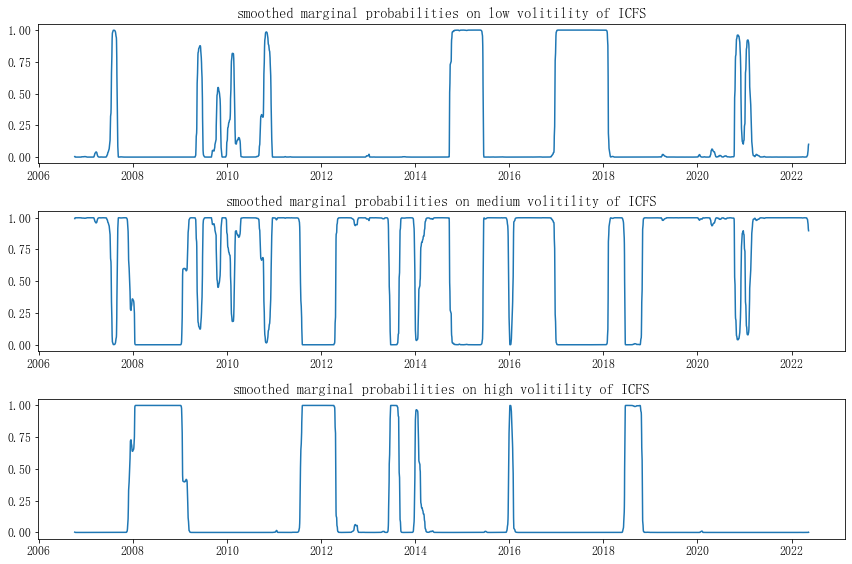

In [43]:
fig, axes = plt.subplots(3, figsize=(12,8))
ax = axes[0]
ax.plot(res.smoothed_marginal_probabilities[0])
ax.set(title='smoothed marginal probabilities on low volitility of ICFS')
ax = axes[1]
ax.plot(res.smoothed_marginal_probabilities[1])
ax.set(title='smoothed marginal probabilities on medium volitility of ICFS')
ax = axes[2]
ax.plot(res.smoothed_marginal_probabilities[2])
ax.set(title='smoothed marginal probabilities on high volitility of ICFS')
fig.tight_layout()
plt.savefig('newMS_prob3.png')    #matplotlib图片保存

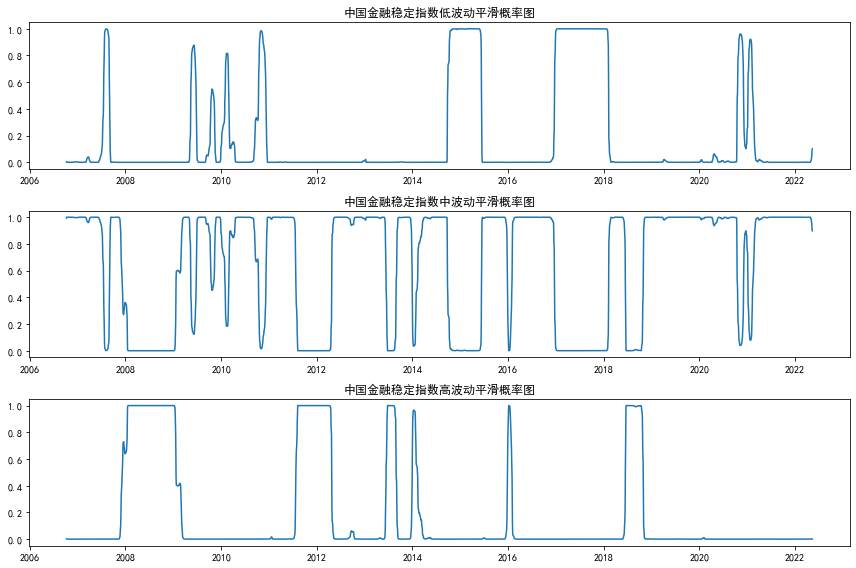

In [37]:
fig, axes = plt.subplots(3, figsize=(12,8))
ax = axes[0]
ax.plot(res.smoothed_marginal_probabilities[0])
ax.set(title='中国金融稳定指数低波动平滑概率图')
ax = axes[1]
ax.plot(res.smoothed_marginal_probabilities[1])
ax.set(title='中国金融稳定指数中波动平滑概率图')
ax = axes[2]
ax.plot(res.smoothed_marginal_probabilities[2])
ax.set(title='中国金融稳定指数高波动平滑概率图')
fig.tight_layout()
plt.savefig('MS_prob3.png')    #matplotlib图片保存

In [16]:
#生成风险状态变量
pd.set_option('display.max_rows', None)  #显示出所有的行，不省略
print(res.smoothed_marginal_probabilities[0])

date
2006-10-08    3.860627e-03
2006-10-09    2.861989e-03
2006-10-10    1.864421e-03
2006-10-11    6.675754e-04
2006-10-12    1.270933e-03
2006-10-13    1.969027e-03
2006-10-16    1.003244e-02
2006-10-17    3.993207e-03
2006-10-18    3.435586e-03
2006-10-19    2.273496e-03
2006-10-20    7.484418e-03
2006-10-23    6.951140e-02
2006-10-24    5.939720e-02
2006-10-25    2.497520e-02
2006-10-26    1.294333e-02
2006-10-27    8.565697e-03
2006-10-30    1.088067e-02
2006-10-31    3.630358e-03
2006-11-01    4.069250e-04
2006-11-02    1.350332e-04
2006-11-03    1.899459e-03
2006-11-06    3.459611e-02
2006-11-07    3.184096e-02
2006-11-08    2.318317e-02
2006-11-09    2.710076e-02
2006-11-10    3.535738e-02
2006-11-13    4.009101e-02
2006-11-14    2.197837e-02
2006-11-15    6.508753e-03
2006-11-16    2.140147e-03
2006-11-17    1.073334e-03
2006-11-20    4.172176e-03
2006-11-21    3.041622e-03
2006-11-22    1.010583e-03
2006-11-23    3.637056e-04
2006-11-24    4.291617e-04
2006-11-27    1.380300e

In [17]:
print(res.smoothed_marginal_probabilities[1])

date
2006-10-08    9.961394e-01
2006-10-09    9.971380e-01
2006-10-10    9.981356e-01
2006-10-11    9.993324e-01
2006-10-12    9.987291e-01
2006-10-13    9.980310e-01
2006-10-16    9.899676e-01
2006-10-17    9.960068e-01
2006-10-18    9.965644e-01
2006-10-19    9.977265e-01
2006-10-20    9.925156e-01
2006-10-23    9.304886e-01
2006-10-24    9.406028e-01
2006-10-25    9.750248e-01
2006-10-26    9.870567e-01
2006-10-27    9.914343e-01
2006-10-30    9.891193e-01
2006-10-31    9.963696e-01
2006-11-01    9.995931e-01
2006-11-02    9.998650e-01
2006-11-03    9.981005e-01
2006-11-06    9.654039e-01
2006-11-07    9.681590e-01
2006-11-08    9.768168e-01
2006-11-09    9.728992e-01
2006-11-10    9.646426e-01
2006-11-13    9.599090e-01
2006-11-14    9.780216e-01
2006-11-15    9.934912e-01
2006-11-16    9.978599e-01
2006-11-17    9.989267e-01
2006-11-20    9.958278e-01
2006-11-21    9.969584e-01
2006-11-22    9.989894e-01
2006-11-23    9.996363e-01
2006-11-24    9.995708e-01
2006-11-27    9.986197e

In [18]:
print(res.smoothed_marginal_probabilities[2])
#手动复制粘贴到Excel

date
2006-10-08    7.491591e-12
2006-10-09    7.556558e-12
2006-10-10    2.347973e-12
2006-10-11    9.734618e-14
2006-10-12    1.012438e-12
2006-10-13    2.757086e-13
2006-10-16    7.357108e-10
2006-10-17    2.517089e-12
2006-10-18    1.425046e-11
2006-10-19    3.711123e-13
2006-10-20    3.279640e-13
2006-10-23    4.156188e-08
2006-10-24    3.716338e-09
2006-10-25    3.608083e-11
2006-10-26    2.714028e-11
2006-10-27    8.200498e-12
2006-10-30    6.015655e-10
2006-10-31    1.071837e-12
2006-11-01    5.655483e-15
2006-11-02    7.457329e-16
2006-11-03    5.583784e-15
2006-11-06    2.370369e-09
2006-11-07    1.025919e-09
2006-11-08    2.368462e-11
2006-11-09    1.611293e-10
2006-11-10    7.896027e-10
2006-11-13    1.033914e-08
2006-11-14    9.321789e-11
2006-11-15    3.218197e-12
2006-11-16    9.422627e-13
2006-11-17    1.064507e-13
2006-11-20    4.311811e-11
2006-11-21    8.511965e-12
2006-11-22    2.181435e-13
2006-11-23    2.871825e-14
2006-11-24    3.719108e-14
2006-11-27    1.405190e